In [9]:
#Initial Code - bring in the data, do some preliminary exploration

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Bring in spray.csv...

spray = pd.read_csv('../Data/spray.csv')
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [27]:
#Bring in train.csv...

train = pd.read_csv('../Data/train.csv')
train.head()
train.columns

Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent'],
      dtype='object')

In [28]:
train.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

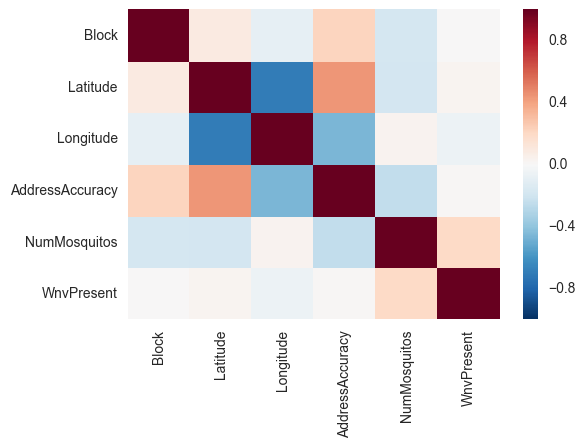

In [10]:
sns.heatmap(train.corr())

In [12]:
#Bring in weather.csv...

weather = pd.read_csv('../Data/weather.csv')
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [13]:
weather.shape

(2944, 22)

In [14]:
weather.columns

Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [25]:
weather.Date.value_counts()

2013-06-02    2
2009-09-14    2
2014-05-31    2
2014-09-26    2
2009-09-13    2
2009-09-12    2
2009-09-11    2
2009-09-10    2
2009-09-17    2
2009-09-16    2
2009-09-15    2
2009-05-18    2
2014-10-19    2
2009-09-19    2
2009-09-18    2
2013-09-10    2
2009-05-19    2
2012-10-07    2
2014-08-30    2
2008-07-25    2
2014-06-22    2
2012-10-06    2
2013-09-22    2
2011-05-09    2
2012-10-01    2
2009-10-01    2
2011-09-21    2
2013-07-24    2
2012-08-04    2
2013-07-03    2
             ..
2007-09-30    2
2011-08-12    2
2013-05-18    2
2012-05-09    2
2012-10-19    2
2012-10-18    2
2011-06-23    2
2014-10-02    2
2007-05-24    2
2012-05-08    2
2007-05-25    2
2007-05-26    2
2007-05-27    2
2014-09-02    2
2008-10-30    2
2008-10-31    2
2009-06-09    2
2009-06-08    2
2012-09-19    2
2012-09-18    2
2009-06-05    2
2008-06-23    2
2008-06-20    2
2008-06-21    2
2008-06-26    2
2008-06-27    2
2008-06-24    2
2008-06-25    2
2011-06-22    2
2007-10-22    2
Name: Date, dtype: int64

In [29]:
#Bring in test.csv...

test = pd.read_csv('../Data/train.csv')
test.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


--PROBLEM STATEMENT--

Use the weather, spraying, and training data to try and predict the location and species of mosquitos that will test positive for West Nile Virus using a regression analysis.